<a href="https://colab.research.google.com/github/usha-1-bandi/nlp/blob/main/ass13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
!pip install nltk requests beautifulsoup4 wordcloud matplotlib spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentences:
1: Natural Language Processing (NLP) is a fascinating field of Artificial Intelligence.
2: It focuses on the interaction between humans and computers using natural language.
3: Tokenization is one of the fundamental steps in NLP, where text is broken down into sentences or words.


Words:
['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', 'field', 'of', 'Artificial', 'Intelligence', '.', 'It', 'focuses', 'on', 'the', 'interaction', 'between', 'humans', 'and', 'computers', 'using', 'natural', 'language', '.', 'Tokenization', 'is', 'one', 'of', 'the', 'fundamental', 'steps', 'in', 'NLP', ',', 'where', 'text', 'is', 'broken', 'down', 'into', 'sentences', 'or', 'words', '.']


Cleaned Text:
hello world welcome to nlp 101


Extracted Emails:
['support@example.com', 'sales@example.org']


Webpage Title:
Example Domain


WordCloud saved as wordcloud.png


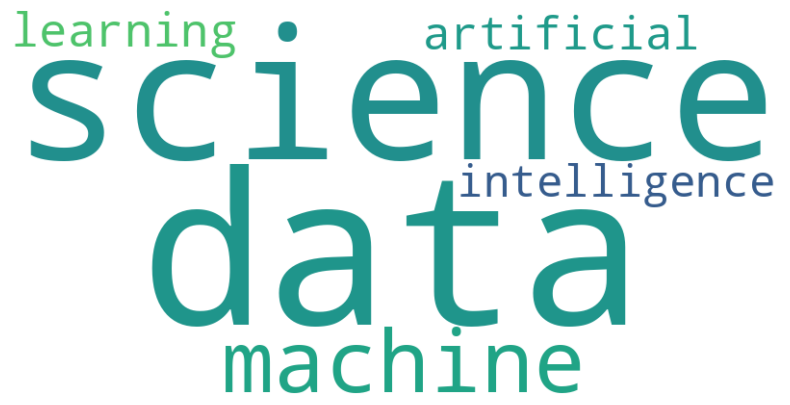



POS Tags:
NLP: PROPN
is: AUX
amazing: ADJ
and: CCONJ
fun: ADJ
to: PART
learn: VERB
.: PUNCT


In [10]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")

sample_paragraph = (
    "Natural Language Processing (NLP) is a fascinating field of Artificial Intelligence. "
    "It focuses on the interaction between humans and computers using natural language. "
    "Tokenization is one of the fundamental steps in NLP, where text is broken down into sentences or words."
)

def tokenize_sentences(paragraph):
    return sent_tokenize(paragraph)

def tokenize_words(paragraph):
    return word_tokenize(paragraph)

def clean_text(text):
    """Remove special characters and convert text to lowercase."""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def extract_emails(text):
    """Extract all email addresses from the given text."""
    email_pattern = r'[\w\.-]+@[\w\.-]+\.\w{2,}'
    return re.findall(email_pattern, text)

def fetch_webpage_title(url):
    """Fetch and print the title of the given webpage."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup.title.string.strip()
    except Exception as e:
        return f"Error fetching webpage title: {e}"

def generate_wordcloud(text, output_file="wordcloud.png"):
    """Generate a WordCloud from the given text and save it as an image."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    wordcloud.to_file(output_file)
    print(f"WordCloud saved as {output_file}")

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def pos_tagging(text):
    """Perform part-of-speech tagging on the given text."""
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

if __name__ == "__main__":
    sentences = tokenize_sentences(sample_paragraph)
    print("Sentences:")
    for idx, sentence in enumerate(sentences, 1):
        print(f"{idx}: {sentence}")

    print("\n")

    words = tokenize_words(sample_paragraph)
    print("Words:")
    print(words)

    print("\n")

    test_text = 'Hello, World! Welcome to NLP 101.'
    cleaned_text = clean_text(test_text)
    print("Cleaned Text:")
    print(cleaned_text)

    print("\n")

    email_text = 'Contact us at support@example.com and sales@example.org.'
    emails = extract_emails(email_text)
    print("Extracted Emails:")
    print(emails)

    print("\n")

    url = 'https://example.com'
    webpage_title = fetch_webpage_title(url)
    print("Webpage Title:")
    print(webpage_title)

    print("\n")

    wordcloud_text = 'data science machine learning artificial intelligence'
    generate_wordcloud(wordcloud_text)

    print("\n")

    pos_text = 'NLP is amazing and fun to learn.'
    pos_tags = pos_tagging(pos_text)
    print("POS Tags:")
    for word, tag in pos_tags:
        print(f"{word}: {tag}")
